In [12]:
# This program implements and evaluates the Protective Put strategy
import pandas as pd
import random
import numpy as np
import bs_module
import statistics
import os
# Current working directory
notebook_directory = os.getcwd()
print(f"The notebook is running in: {notebook_directory}")

The notebook is running in: /Users/enriquecaballero/Documents/Python


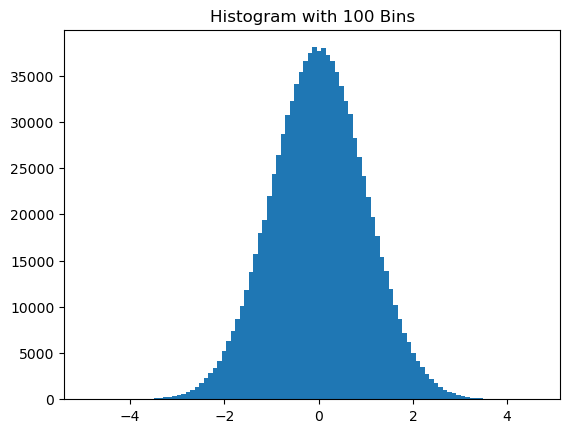

In [14]:
# Set up the random numbers
#
numran=1000
np.random.seed(221)
rand_norm_c=np.random.normal(loc=0, scale=1, size=1000000)
import matplotlib.pyplot as plt
#
_ = plt.hist(rand_norm_c, bins=100) # arguments are passed to np.histogram
plt.title("Histogram with 100 Bins")
plt.show()

In [16]:
#
strike_vals=[0.95,1.00,1.05]
drift_vals=[0.08,0.12]
Volatility_vals=[0.2,0.25,0.3]
tcount=1
scount=1
vcount=1
dcount=1
results=np.zeros((10,9))

In [ ]:
S0=100
rf=0.05
T=1/12
numpath=10000
strike=strike_vals[1]
drift=drift_vals[1]
Volatility=Volatility_vals[1]

PPut_Rets=np.zeros((numpath))
St_Ret=np.zeros((numpath))
jcount=0
lcount=0

while jcount < numpath:
    S_t=S0
    # Initiate the Rollovers
    k0=int(S0*strike)
    m0=2/12
    PPut_Val=bs_module.bsval(S0,k0,rf,m0,Volatility, 2)
    for kcount in range(0,12):
        S_t1=S_t*(np.exp(drift*T+Volatility*np.sqrt(T)*rand_norm_c[lcount]))
        # 1 month option at old strike
        kt=int(S_t*strike)
        mt=1/12
        PP_t=bs_module.bsval(S_t,kt,rf,mt,Volatility, 2)
        # 2 month option at new strike
        kt1=int(S_t1*strike)
        mt1=2/12
        PP_t1=bs_module.bsval(S_t1,kt1,rf,mt1,Volatility, 2)
        if kcount > 10:
            PPut_Val = PPut_Val*np.exp(rf/12)+PP_t+S_t1
            PPut_Rets[jcount]=np.log(PPut_Val/S0)
            St_Ret[jcount]=np.log(S_t1/S0)
            #if(PPut_Val < 0):
            #   print("1",PPut_Val,S_t1,mt1,kt,kt1,PP_t,PP_t1,"\n")    
        if kcount < 11:
            PPut_Val = PPut_Val*np.exp(+rf*1/12)+(PP_t-PP_t1)
            print("1",S_t,S_t1,kt,kt1,PP_t,PP_t1,"\n")
            #Reset values for strike and Stock Price     
        S_t=S_t1
        lcount=lcount+1
    jcount=jcount+1
print(jcount)
#
rf
#
# Store Results for the Protective Put Strategies
#

1 100 104.88984083963888 100 104 2.02 1.55 

1 104.88984083963888 106.34580461812814 104 106 1.72 1.79 

1 106.34580461812814 106.14315328868379 106 106 1.99 1.88 

1 106.14315328868379 102.53308334232531 106 102 2.08 1.65 

1 102.53308334232531 113.44999595738068 102 113 1.83 1.88 

1 113.44999595738068 121.58928101612466 113 121 2.09 1.97 

1 121.58928101612466 116.07602642173427 121 116 2.19 2.09 

1 116.07602642173427 118.91453150710682 116 118 2.31 1.8 

1 118.91453150710682 110.49852185102381 118 110 1.99 1.81 

1 110.49852185102381 98.66931243665705 110 98 2.0 1.52 

1 98.66931243665705 91.79183130824933 98 91 1.69 1.35 

1 100 95.89051814668558 100 95 2.02 1.38 

1 95.89051814668558 94.70013072403266 95 94 1.54 1.44 

1 94.70013072403266 102.15882975150146 94 102 1.6 1.79 

1 102.15882975150146 110.32456712974601 102 110 1.99 1.87 

1 110.32456712974601 98.68706912621647 110 98 2.08 1.52 

1 98.68706912621647 105.43369024695464 98 105 1.69 1.74 

1 105.43369024695464 106.852228

In [ ]:
mean_s=statistics.mean(St_Ret)
sd_s=statistics.stdev(St_Ret)
mean_pp=statistics.mean(PPut_Rets)
sd_pp=statistics.stdev(PPut_Rets)

print(mean_s, sd_s)
print(mean_pp, sd_pp)